# Dépendances

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub



In [ ]:
# Download latest version
path = kagglehub.dataset_download("utkarshx27/american-companies-bankruptcy-prediction-dataset")

print("Path to dataset files:", path)

100%|██████████| 4.47M/4.47M [00:05<00:00, 853kB/s] 

Extracting files...
Path to dataset files: /home/lucas/.cache/kagglehub/datasets/utkarshx27/american-companies-bankruptcy-prediction-dataset/versions/3


: 

: 

# EDA

In [ ]:
data = pd.read_csv("/home/lucas/finance_projet/american_bankruptcy.csv", sep=",")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78682 entries, 0 to 78681
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   company_name  78682 non-null  object 
 1   status_label  78682 non-null  object 
 2   year          78682 non-null  int64  
 3   X1            78682 non-null  float64
 4   X2            78682 non-null  float64
 5   X3            78682 non-null  float64
 6   X4            78682 non-null  float64
 7   X5            78682 non-null  float64
 8   X6            78682 non-null  float64
 9   X7            78682 non-null  float64
 10  X8            78682 non-null  float64
 11  X9            78682 non-null  float64
 12  X10           78682 non-null  float64
 13  X11           78682 non-null  float64
 14  X12           78682 non-null  float64
 15  X13           78682 non-null  float64
 16  X14           78682 non-null  float64
 17  X15           78682 non-null  float64
 18  X16           78682 non-nu

: 

In [ ]:
numerical_columns = data.select_dtypes(include= 'float64')
numerical_columns.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18
count,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,7.868200e+04,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000
mean,880.362485,1594.529029,121.234256,376.759424,201.605717,129.382453,286.832743,3.414355e+03,2364.019706,2867.110620,722.483710,255.525035,769.490783,610.072255,532.467069,2364.019706,1773.563963,1987.260307
std,3928.564794,8930.484664,652.376804,2012.023142,1060.766096,1265.532022,1335.978571,1.841410e+04,11950.068842,12917.944421,3242.170946,1494.643534,3774.703114,2938.387443,6369.159440,11950.068842,8053.684902,10419.629038
min,-7.760000,-366.645000,0.000000,-21913.000000,0.000000,-98696.000000,-0.006000,1.000000e-04,-1964.999000,0.001000,-0.023000,-25913.000000,-21536.000000,0.001000,-102362.000000,-1964.999000,0.001000,-317.197000
25%,18.924000,17.038250,1.192000,-0.811000,0.000000,-7.415750,3.281250,3.498000e+01,27.548500,37.363500,0.000000,-2.787000,8.521250,8.889250,-68.282750,27.548500,13.486000,32.872500
50%,100.449500,103.661000,7.929500,15.034500,7.023000,1.616000,22.820000,2.275118e+02,186.598500,213.203500,7.593500,6.518000,63.581500,43.333000,-1.131000,186.598500,81.988000,168.912000
75%,431.526750,634.548000,47.971750,139.655250,74.747250,40.144250,131.580500,1.244890e+03,1046.402500,1171.364750,248.760750,87.599000,344.074250,222.817000,146.070000,1046.402500,629.975000,875.522250
max,169662.000000,374623.000000,28430.000000,81730.000000,62567.000000,104821.000000,65812.000000,1.073391e+06,511729.000000,531864.000000,166250.000000,71230.000000,137106.000000,116866.000000,402089.000000,511729.000000,337980.000000,481580.000000


: 

In [ ]:
for col in numerical_columns:
    plt.figure(figsize=(6, 4))
    data[col].hist(bins=100, edgecolor='black')
    plt.title(f'Distribution de {col}')
    plt.xlabel(col)
    plt.show()

: 

## Preprocess 

In [ ]:
# Rename

# Delete company_name column
df = data
df = df.drop(columns=['company_name'], axis=1)

# Rename "X" columns
df.rename(columns={
    'X1':'current_assets',
    'X2':'cost_of_goods_sold',
    'X3':'depreciation _and_amortization',
    'X4':'ebitda',
    'X5':'inventory',
    'X6':'net_income',
    'X7':'total_receivables',
    'X8':'market_value',
    'X9':'net_sales',
    'X10':'total_assets',
    'X11':'total_long_term_debt',
    'X12':'ebit',
    'X13':'gross_profit',
    'X14':'total_current_liabilities',
    'X15':'retained_earnings',
    'X16':'total_revenue',
    'X17':'total_liabilities',
    'X18':'total_operating_expenses'}, inplace = True)

# Recode and rename target
df['status_label'] = df['status_label'].apply(lambda x : 0 if x == 'alive' else 1)
df = df.rename(columns={'status_label':'bankruptcy'})

: 

In [ ]:
# Features
df['equity'] = df['total_assets']-df['total_liabilities']
df['current_ratio'] = df['current_assets']/df['total_current_liabilities']
df['net_margin'] = df['net_income']/df['total_revenue']
df['gross_margin'] = df['gross_profit']/df['total_revenue']
df['ebit_margin'] = df['ebit']/df['total_revenue']
df['ebitda_margin'] = df['ebitda']/df['total_revenue']
df['liabilities_to_assets'] = df['total_liabilities']/df['total_assets']
df['debt_to_assets'] = df['total_long_term_debt']/df['total_assets']
df['debt_to_equity'] = df['total_long_term_debt']/df['equity']
df['debt_to_liabilities'] = df['total_long_term_debt']/df['total_liabilities']
df['roa'] = df['net_income']/df['total_assets']
df['roe'] = df['net_income']/df['equity']

df = df.drop(df.columns[1:21], axis=1)


: 

In [ ]:
df.head()

,bankruptcy,current_ratio,net_margin,gross_margin,ebit_margin,ebitda_margin,liabilities_to_assets,debt_to_assets,debt_to_equity,debt_to_liabilities,roa,roe
0,0,3.120983,0.034328,0.186683,0.068980,0.086916,0.541814,0.243519,0.531485,0.449451,0.047454,0.103568
1,0,3.874697,0.021196,0.183521,0.052376,0.073625,0.515267,0.256445,0.529044,0.497694,0.026403,0.054469
2,0,2.902063,-0.092277,0.175732,0.007376,0.042596,0.563172,0.306532,0.701723,0.544296,-0.082989,-0.189982
3,0,1.947253,-0.020467,0.180741,0.005893,0.050706,0.570377,0.239809,0.558185,0.420440,-0.018074,-0.042070
4,0,3.292707,0.005375,0.197338,0.031921,0.072844,0.574669,0.350583,0.824260,0.610062,0.004940,0.011615


: 

In [ ]:
'''
def trier(data, date_min, date_max):
    conn = sqlite3.connect(':memory:')
    
    data.to_sql('tab', conn, index=False, if_exists='replace')

    query = "SELECT * FROM tab WHERE year >= ? AND year <= ?"

    result = pd.read_sql_query(query, conn, params=(date_min, date_max))
    
    conn.close()
    return result

#Répartion
train = trier(df, 1985, 2011)
valid = trier(df, 2012,2014)
test = trier(df, 2015,2019)
'''

: 

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV, learning_curve

def preprocess(df):
    # Séparation features
    y = df['bankruptcy']
    X = df.drop(columns='bankruptcy')

    # Nettoyage : remplacement des inf, -inf par NaN
    X.replace([np.inf, -np.inf], np.nan, inplace=True)
    X.dropna(inplace=True) 
    y = y.loc[X.index]

    # Normalisation
    sc = StandardScaler()
    X_scaled = sc.fit_transform(X)

    # Split
    X_train, X_test, y_train, y_test  = train_test_split(X_scaled, y, test_size=0.4, random_state=0)

    return  X, y, X_train, X_test, y_train, y_test

X, y, X_train, X_test, y_train, y_test = preprocess(df)



: 

In [ ]:
from imblearn.over_sampling import SMOTE

# SMOTE
smote = SMOTE(sampling_strategy=0.3, random_state=0)

X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

: 

# MODEL 

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

params = {'n_estimators' : [1,10,100, 300],
    'learning_rate' : [0.001, 0.001, 0.1, 0.3],
    'max_depth': [5, 10, 30, 50, None],
    'subsample' : [0.3, 0.5, 0.8],
    'colsample_bytree' : [0.3, 0.5, 0.8], 
    'reg_alpha': [0.001, 0.001, 0.1, 0.3],  
    'reg_lambda' : [0.001, 0.001, 0.1, 0.3],
    'scale_pos_weight' : [1, 3, 5, 10]}

grid = RandomizedSearchCV(XGBClassifier(), params, cv=5, n_iter=10,random_state= 0)
grid.fit(X_train_smote, y_train_smote)
print(grid.best_params_)
y_pred = grid.predict(X_test)
grid.best_estimator_.score(X_test, y_test)

{'subsample': 0.5, 'scale_pos_weight': 5, 'reg_lambda': 0.1, 'reg_alpha': 0.3, 'n_estimators': 100, 'max_depth': 10, 'learning_rate': 0.3, 'colsample_bytree': 0.8}


0.8324860193187595

: 

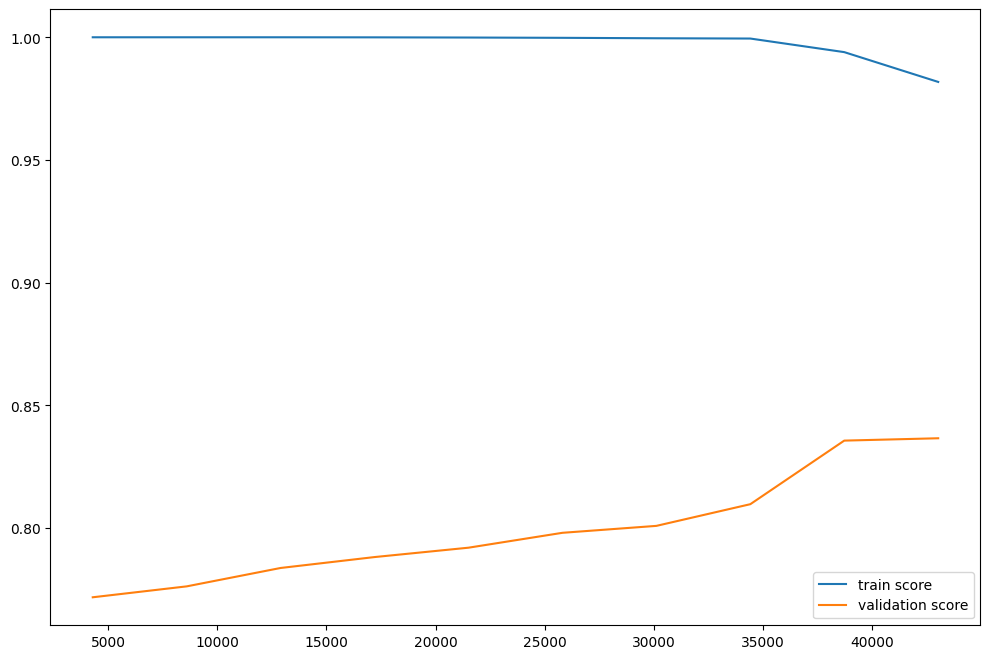

: 

In [ ]:
def evaluation(model, X_train, y_train):
    
    model.fit(X_train, y_train)
    ypred = model.predict(X_test)
    
    N, train_score, val_score = learning_curve(model, X_train, y_train,
                                              cv=4,
                                               train_sizes=np.linspace(0.1, 1, 10))
    
    
    plt.figure(figsize=(12, 8))
    plt.plot(N, train_score.mean(axis=1), label='train score')
    plt.plot(N, val_score.mean(axis=1), label='validation score')
    plt.legend()

evaluation(grid.best_estimator_, X_train_smote,y_train_smote)

## Explainability 

100%|===================| 31454/31472 [05:09<00:00]        

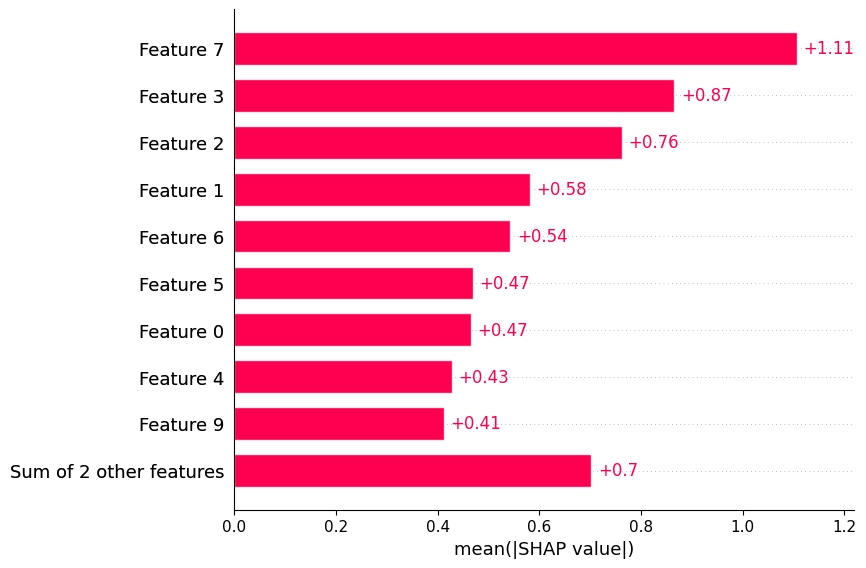

: 

In [ ]:
import shap

params = {'subsample': 0.5, 'scale_pos_weight': 5, 'reg_lambda': 0.1, 'reg_alpha': 0.3, 'n_estimators': 100, 'max_depth': 10, 'learning_rate': 0.3, 'colsample_bytree': 0.8}
model = XGBClassifier(**params)
model.fit(X_train_smote, y_train_smote)


In [ ]:
feature_names = X.columns
X_train_smote_names = pd.DataFrame(X_train_smote, columns=feature_names)
X_test_names  = pd.DataFrame(X_test, columns=feature_names)

,current_ratio,net_margin,gross_margin,ebit_margin,ebitda_margin,liabilities_to_assets,debt_to_assets,debt_to_equity,debt_to_liabilities,roa,roe
0,-0.021087,0.041232,0.031226,0.041853,0.041283,-0.016943,0.053390,-0.030462,1.946999,0.054987,0.000423
1,0.006714,0.041140,0.031516,0.041277,0.040650,-0.035869,-0.022517,-0.006763,-1.009877,0.053428,0.003853
2,0.034147,0.041192,0.031790,0.041306,0.040771,-0.038806,-0.022517,-0.006763,-1.009877,0.052594,0.003707
3,0.000852,0.040890,0.032157,0.041035,0.040269,-0.033043,-0.011308,-0.005982,0.266541,0.047171,0.002966
4,-0.008852,0.041216,0.031659,0.041624,0.040946,-0.033975,-0.014099,-0.006215,0.068869,0.058242,0.004596
...,...,...,...,...,...,...,...,...,...,...,...
57349,-0.020660,0.041455,0.032395,0.042325,0.042459,-0.025478,0.034969,0.002677,2.428647,0.053044,0.004394
57350,-0.019585,0.040908,0.031499,0.041259,0.040921,-0.026583,0.019146,-0.000994,1.668009,0.049273,0.003225
57351,-0.036117,0.040483,0.031167,0.040905,0.040276,-0.008048,-0.022448,-0.006768,-1.007916,0.031568,0.006761
57352,-0.018762,0.040094,0.031317,0.040483,0.040066,-0.033741,-0.010606,-0.005974,0.469577,0.031794,0.000754


100%|===================| 31426/31472 [05:03<00:00]        

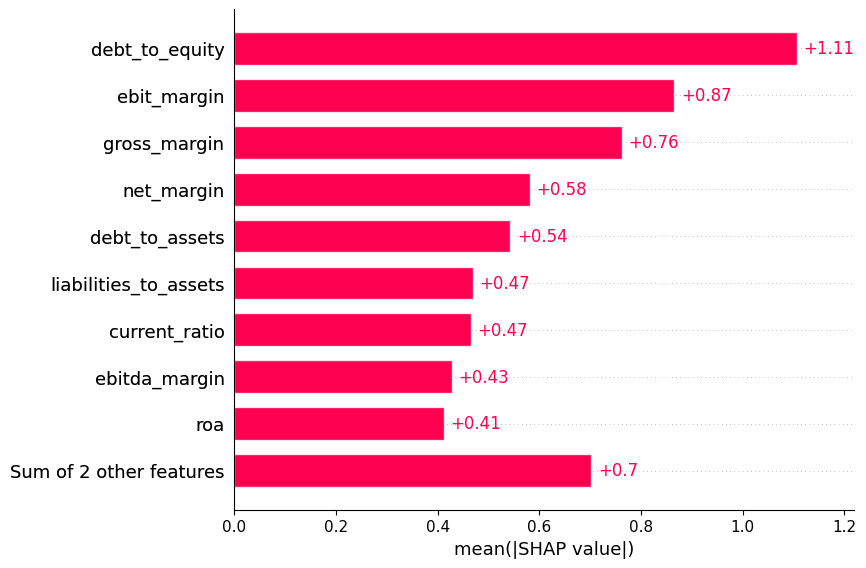

In [52]:
explainer = shap.Explainer(model, X_train_smote_names)
shap_values = explainer(X_test_names)
shap.plots.bar(shap_values)

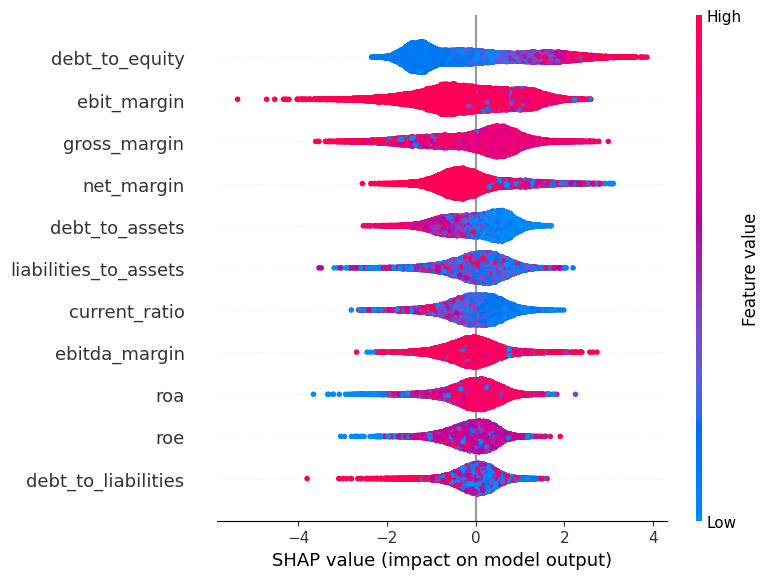

In [58]:
shap.summary_plot(shap_values, X_test)


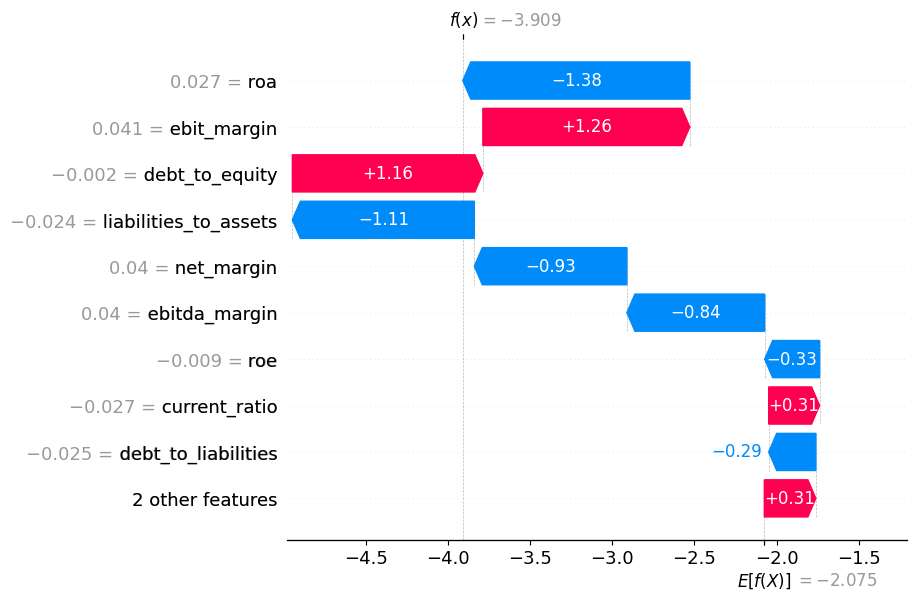

In [60]:
shap.plots.waterfall(shap_values[2])

In [ ]:
## LIME
from lime.lime_tabular import LimeTabularExplainer

explainer_lime = LimeTabularExplainer(
    training_data=np.array(X_train_smote),
    feature_names=feature_names,
    class_names=['Non-Faillite', 'Faillite'],
    mode='classification'
)

exp = explainer_lime.explain_instance(
    data_row=X_test_names.iloc[0],
    predict_fn=model.predict_proba,
    num_features=12
)

/home/lucas/.cache/pypoetry/virtualenvs/lucas-DBnCCWsD-py3.12/lib/python3.12/site-packages/lime/discretize.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/home/lucas/.cache/pypoetry/virtualenvs/lucas-DBnCCWsD-py3.12/lib/python3.12/site-packages/lime/discretize.py:110: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/home/lucas/.cache/pypoetry/virtualenvs/lucas-DBnCCWsD-py3.12/lib/python3.12/site-packages/lime/lime_tabular.py:544: FutureWarning: Series.__getitem__ treating keys as positions is depr

ImportError: cannot import name 'display' from 'IPython.core.display' (/home/lucas/.cache/pypoetry/virtualenvs/lucas-DBnCCWsD-py3.12/lib/python3.12/site-packages/IPython/core/display.py)

In [72]:
html_exp = exp.as_html()
with open('lime_explanation.html', 'w') as f:
    f.write(html_exp)

In [73]:
import joblib

joblib.dump(model, 'model.pkl')


['model.pkl']